In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Activation, LeakyReLU, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import SGD
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print("Imported")
base_path = "C:\\Users\\06man\\Documents\\ml_data\\"


Imported


In [2]:
print("START123")
config = tf.compat.v1.ConfigProto(gpu_options=tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.3))
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

START123


In [53]:
# Model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,2), input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
model.add(MaxPool2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=64, kernel_size=(3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(32))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.4))

#model.add(Dense(25))
#model.add(LeakyReLU(0.1))
#model.add(Dropout(0.4))

model.add(Dense(5))
model.add(Activation('softmax'))

epochs = 50
learning_rate = 0.005
decay_rate = learning_rate / epochs
momentum = 0.0
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 223, 223, 32)      416       
_________________________________________________________________
batch_normalization_36 (Batc (None, 223, 223, 32)      128       
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 110, 110, 64)      8256      
_________________________________________________________________
batch_normalization_37 (Batc (None, 110, 110, 64)      256       
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 110, 110, 64)    

In [14]:
#data
#x_train = np.load(f"{base_path}x_train.npy")
#y_train = np.load(f"{base_path}y_train.npy")
x_train = np.load(f"{base_path}x_train.npy")
y_train = np.load(f"{base_path}y_train.npy")

print("LOADED")
print(x_train.shape)
print(y_train.shape)


LOADED
(2000, 224, 224, 3)
(2000, 5)


In [55]:
#with tf.device('/cpu:0'):
trained = model.fit(x_train, y_train, batch_size=16, epochs=epochs, validation_split = 0.1, shuffle = True)

Epoch 1/50
113/113 [==============================] - 6s 53ms/step - loss: 2.4358 - accuracy: 0.4656 - val_loss: 1.4105 - val_accuracy: 0.4050
Epoch 2/50
113/113 [==============================] - 6s 50ms/step - loss: 1.4504 - accuracy: 0.5411 - val_loss: 1.8206 - val_accuracy: 0.1700
Epoch 3/50
113/113 [==============================] - 6s 50ms/step - loss: 1.4523 - accuracy: 0.5661 - val_loss: 1.3135 - val_accuracy: 0.5700
Epoch 4/50
113/113 [==============================] - 6s 49ms/step - loss: 1.0901 - accuracy: 0.6283 - val_loss: 1.1692 - val_accuracy: 0.6100
Epoch 5/50
113/113 [==============================] - 6s 50ms/step - loss: 1.0516 - accuracy: 0.6378 - val_loss: 1.1646 - val_accuracy: 0.5700
Epoch 6/50
113/113 [==============================] - 6s 50ms/step - loss: 0.9584 - accuracy: 0.6656 - val_loss: 1.2941 - val_accuracy: 0.5550
Epoch 7/50
113/113 [==============================] - 6s 50ms/step - loss: 0.8589 - accuracy: 0.6844 - val_loss: 1.1412 - val_accuracy: 0.5800

In [ ]:
plt.plot(trained.history['loss'], label="loss")
plt.plot(trained.history['val_loss'], label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

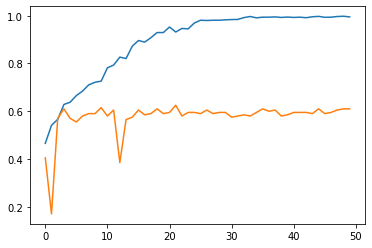

In [57]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])


In [58]:
#with tf.device('/cpu:0'):
x_test = np.load(f"{base_path}x_test.npy")
y_test = np.load(f"{base_path}y_test.npy")
print(x_test.shape)
print(y_test.shape)
print(model.evaluate(x=x_test, y=y_test))
print("DONE")

(200, 224, 224, 3)
(200, 5)
7/7 [==============================] - 0s 28ms/step - loss: 2.1712 - accuracy: 0.6600
[2.1712419986724854, 0.6600000262260437]
DONE


In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

#with tf.device('/cpu:0'):
y_hat = model.predict(x_test)
# confusion matrix
matrix = multilabel_confusion_matrix(y_test,  y_hat.round())
print('Confusion matrix : \n',matrix)
    #print(y_test)



Confusion matrix : 
 [[[193   2]
  [  5   0]]

 [[161  18]
  [ 11  10]]

 [[177   3]
  [ 19   1]]

 [[ 31  36]
  [ 10 123]]

 [[177   2]
  [ 21   0]]]


In [14]:
from numba import cuda
cuda.select_device(0)
cuda.close()
print("FREED")

FREED
